[ADS Entry](http://adsabs.harvard.edu/abs/1998ApJ...497L..17S)

In [380]:
import sympy
sympy.init_printing()

Supra - thermal electron distribution

In [381]:
gamma_e = sympy.Symbol('gamma_e')
C_e = sympy.Symbol('C_e')
p = sympy.Symbol('p')
gamma_m = sympy.Symbol('gamma_m')
electron_distribution_ansatz = C_e*gamma_e**(-p)
electron_distribution_ansatz

Shocked number density

In [382]:
gamma = sympy.Symbol('gamma')
n = sympy.Symbol('n', positive=True)
shocked_number_density = gamma*n

Shocked energy density

In [383]:
m_p = sympy.Symbol('m_p', positive=True)
c = sympy.Symbol('c', positive=True)
shocked_energy_density = gamma**2*m_p*c**2*n

In [384]:
m_e = sympy.Symbol('m_e', positive=True)
epsilon_e = sympy.Symbol('epsilon_e', positive=True)
_ = [sympy.integrate(electron_distribution_ansatz,gamma_e,conds='none'),
     sympy.integrate(electron_distribution_ansatz*gamma_e*m_e*c**2,gamma_e,conds='none')]
_ = [-itm.subs(gamma_e,gamma_m).simplify() for itm in _]
_ = [sympy.Eq(_[0],shocked_number_density),
     sympy.Eq(_[1],shocked_energy_density*epsilon_e)]
_ = sympy.solve(_,[C_e,gamma_m])[0]
C_e_expr, gamma_m_expr = _

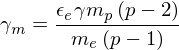

In [385]:
sympy.Eq(gamma_m,gamma_m_expr)

Magnetic field strength

In [386]:
epsilon_B = sympy.Symbol('epsilon_B',positive=True)
B = sympy.Symbol('B')
magnetic_field = sympy.sqrt(epsilon_B*shocked_energy_density)
sympy.Eq(B,magnetic_field)

Synchrotron radiation power

In [387]:
P_gamma_e = sympy.Symbol(r'P\left(\gamma_e\right)')
sigma_T = sympy.Symbol('sigma_T', positive=True)
synchrotron_radiation_power = sigma_T*c*gamma**2*gamma_e**2*B**2
sympy.Eq(P_gamma_e,synchrotron_radiation_power)

Characteristic frequency

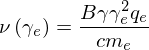

In [388]:
nu_gamma_e = sympy.Symbol(r'\nu \left(\gamma_e\right)')
q_e = sympy.Symbol('q_e', positive=True)
characteristic_frequency = gamma*gamma_e**2*q_e*B/(m_e*c)
sympy.Eq(nu_gamma_e, characteristic_frequency)

Peak power

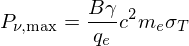

In [389]:
P_nu_max = sympy.Symbol(r'P_{\nu,\max}')
peak_power = synchrotron_radiation_power/ characteristic_frequency
sympy.Eq(P_nu_max, peak_power)

Critical cooling Lorentz factor

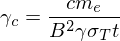

In [390]:
gamma_c = sympy.Symbol('gamma_c')
t = sympy.Symbol('t',positive=True)
_ = sympy.Eq(gamma*gamma_c*m_e*c**2,
             P_gamma_e*t)
_ = _.subs(P_gamma_e, synchrotron_radiation_power)
_ = _.subs(gamma_e,gamma_c).simplify()
critical_lorentz_factor = sympy.solve(_,gamma_c)[1]
sympy.Eq(gamma_c, critical_lorentz_factor)

Adiabatic shock trajectory

In [391]:
E = sympy.Symbol('E',positive=True)
R = sympy.Symbol('R')
adiabatic_shock_energy = gamma**2*R**3*n*m_p*c**2
sympy.Eq(E,adiabatic_shock_energy)

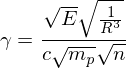

In [392]:
adiabatic_shock_trajectory = sympy.solve(adiabatic_shock_energy-E,gamma)[1]
sympy.Eq(gamma,adiabatic_shock_trajectory)

Relativistic Sedov Length

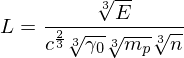

In [393]:
L = sympy.Symbol('L', positive=True)
gamma_0 = sympy.Symbol('gamma_0', positive=True)
relativistic_sedov_length = sympy.solve(sympy.Eq(E,L**3*n*m_p*c**2*gamma_0),L)[0]
sympy.Eq(L,relativistic_sedov_length)

Raditative shock trajectory

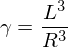

In [394]:
radiative_shock_trajectory = (R/L)**(-3)
sympy.Eq(gamma,radiative_shock_trajectory)

Observers time

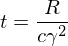

In [395]:
observer_time = R/(c*gamma**2)
sympy.Eq(t,observer_time)

Equation 9 - adiabatic case

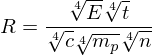

In [396]:
_ = adiabatic_shock_trajectory
_ = sympy.solve(_-sympy.solve(observer_time-t,gamma)[1],R)[1]
adiabatic_radius_time = _
sympy.Eq(R,adiabatic_radius_time)

Equation 9 - radiative case

In [397]:
_ = radiative_shock_trajectory
_ = sympy.solve(_-sympy.solve(observer_time-t,gamma)[1],R)[0]
radiative_radius_time = _
sympy.Eq(R,radiative_radius_time)

Equation 10 - adiabatic case

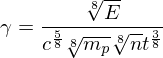

In [398]:
_ = adiabatic_shock_trajectory.subs(R,adiabatic_radius_time)
adiabatic_gamma_time = sympy.expand_power_base(_,force=True)
sympy.Eq(gamma, adiabatic_gamma_time)

Equation 10 - radiative case

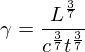

In [399]:
_ = radiative_shock_trajectory.subs(R,radiative_radius_time)
radiative_gamma_time = _
sympy.Eq(gamma,radiative_gamma_time)

Adiabatic critical frequency

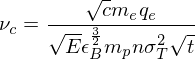

In [400]:
nu_c = sympy.Symbol('nu_c')
_ = characteristic_frequency.subs(gamma_e, critical_lorentz_factor)
_ = _.subs(B,magnetic_field)
_ = _.subs(gamma,adiabatic_gamma_time)
_ = sympy.expand_power_base(_,force=True)
adiabatic_nu_c = _
sympy.Eq(nu_c,adiabatic_nu_c)

Adiabatic minimal frequency

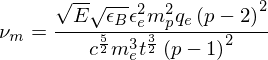

In [401]:
nu_m = sympy.Symbol('nu_m')
_ = characteristic_frequency
_ = _.subs(gamma_e, gamma_m_expr)
_ = _.subs(B,magnetic_field)
_ = _.subs(gamma, adiabatic_gamma_time)
_ = sympy.expand_power_base(_,force=True)
adiabatic_nu_m = _
sympy.Eq(nu_m, adiabatic_nu_m)

Adiabatic peak flux

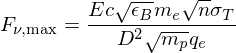

In [402]:
D = sympy.Symbol('D')
F_nu_max = sympy.Symbol(r'F_{\nu, \max}')
_ = peak_power*n*R**3/D**2
_ = _.subs(R, adiabatic_radius_time)
_ = _.subs(B,magnetic_field)
_ = _.subs(gamma,adiabatic_gamma_time)
_ = sympy.expand_power_base(_,force=True)
adiabatic_peak_flux = _
sympy.Eq(F_nu_max, adiabatic_peak_flux)

Radiative critical frequency

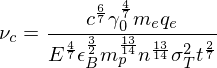

In [403]:
_ = characteristic_frequency.subs(gamma_e, critical_lorentz_factor)
_ = _.subs(B,magnetic_field)
_ = _.subs(gamma,radiative_gamma_time)
_ = _.subs(L,relativistic_sedov_length)
_ = sympy.expand_power_base(_,force=True)
radiative_nu_c = _
sympy.Eq(nu_c,radiative_nu_c)

Radiative minimal frequency

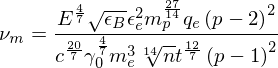

In [404]:
_ = characteristic_frequency
_ = _.subs(gamma_e, gamma_m_expr)
_ = _.subs(B,magnetic_field)
_ = _.subs(gamma, radiative_gamma_time)
_ = _.subs(L,relativistic_sedov_length)
_ = sympy.expand_power_base(_,force=True)
radiative_nu_m = _
sympy.Eq(nu_m, radiative_nu_m)

Radiative peak flux

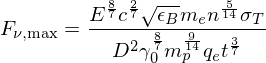

In [405]:
_ = peak_power*n*R**3/D**2
_ = _.subs(R, radiative_radius_time)
_ = _.subs(B,magnetic_field)
_ = _.subs(gamma,radiative_gamma_time)
_ = _.subs(L,relativistic_sedov_length)
_ = sympy.expand_power_base(_,force=True)
radiative_peak_flux = _
sympy.Eq(F_nu_max, radiative_peak_flux)

Adiabatic transition time

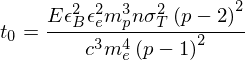

In [406]:
t_0 = sympy.Symbol('t_0')
_ = sympy.Eq(adiabatic_nu_c,
             adiabatic_nu_m)
adiabatic_transition_time = sympy.solve(_,t)[0]
sympy.Eq(t_0, adiabatic_transition_time)

Radiative transition time

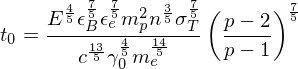

In [407]:
xi = sympy.Symbol('xi',positive=True)
_ = sympy.Eq(radiative_nu_c,
            radiative_nu_m)
_ = _.subs(sympy.solve(sympy.Eq(xi,(p-2)/(p-1)))[0]).simplify()
_ = sympy.solve(sympy.expand_power_base(_.rhs/_.lhs,force=True)-1,t)[-1]
_ = _.subs(xi,(p-2)/(p-1))
radiative_transition_time = _
sympy.Eq(t_0, radiative_transition_time)

Critical time for a given frequency, adiabatic case

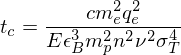

In [408]:
t_c = sympy.Symbol('t_c')
nu = sympy.Symbol('nu', positive=True)
_ = sympy.Eq(nu,adiabatic_nu_c)
_ = sympy.solve(_,t)[0]
adiabatic_t_c_nu = _
sympy.Eq(t_c, adiabatic_t_c_nu)

Critical time for a given frequency, radiative case

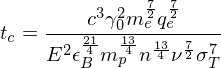

In [409]:
_ = sympy.Eq(nu,radiative_nu_c)
_ = sympy.solve(_,t)[0]
_ = sympy.expand_power_base(_,force=True)
radiative_t_c_nu = _
sympy.Eq(t_c, radiative_t_c_nu)

$t_m$ for the adiabatic case

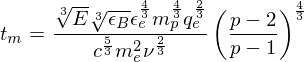

In [410]:
t_m = sympy.Symbol('t_m')
_ = sympy.Eq(nu,adiabatic_nu_m)
_ = _.subs(sympy.solve(sympy.Eq(xi,(p-2)/(p-1)))[0]).simplify()
_ = sympy.solve(_,t)[0]
_ = _.subs(xi,(p-2)/(p-1))
adiabatic_t_m_nu = _
sympy.Eq(t_m, adiabatic_t_m_nu)

$t_m$ for the radiative case

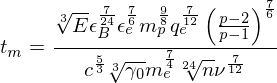

In [411]:
_ = sympy.Eq(nu,radiative_nu_m)
_ = _.subs(sympy.solve(sympy.Eq(xi,(p-2)/(p-1)))[0]).simplify()
_ = sympy.solve(_,t)[0]
_ = _.subs(xi,(p-2)/(p-1))
radiative_t_m_nu = _
sympy.Eq(t_m, radiative_t_m_nu)

$\nu_0$ for the adiabatic case

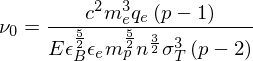

In [412]:
nu_0 = sympy.Symbol('nu_0')
_ = adiabatic_nu_c.subs(t,adiabatic_transition_time)
_ = _.subs(sympy.solve(sympy.Eq(xi,(p-2)/(p-1)))[0]).simplify()
_ = _.subs(xi,(p-2)/(p-1))
adiabatic_nu_0 = _
sympy.Eq(nu_0,_)

$\nu_0$ for the radiative case

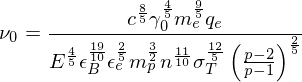

In [413]:
_ = radiative_nu_c.subs(t,radiative_transition_time)
_ = _.subs(sympy.solve(sympy.Eq(xi,(p-2)/(p-1)))[0]).simplify()
_ = _.subs(xi,(p-2)/(p-1))
radiative_nu_0 = _
sympy.Eq(nu_0,_)

Transition from radiative to adiabatic regime

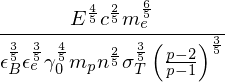

In [426]:
_ = gamma**2*R**3*n*m_p*c**2
_ = _.subs(R, radiative_radius_time)
_ = _.subs(gamma, radiative_gamma_time)
_ = _.subs(L, relativistic_sedov_length)
_ = _.subs(t, radiative_transition_time)
_ = _.subs(sympy.solve(sympy.Eq(xi,(p-2)/(p-1)))[0]).simplify()
_ = _.subs(xi,(p-2)/(p-1))
_